# **In this project, we want to visualize output feature maps of convolution layers in a popular CNN architecture:** ***VGG19***

Step 0:
Mounting google drive into colab

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Step 1:
Importing VGG19 from keras.applications and creat our model

In [ ]:
from keras.applications.vgg19 import VGG19

model = VGG19()

574710816/574710816 [==============================] - 25s 0us/step


Step 2:
loop over all layers of the model, find convolution layers and save their indexes in a list.

In [ ]:
# creat an empty list of indexes
conv_layer_idx = []
#loop over layers
for i in range(len(model.layers)):
  layer = model.layers[i]
	#find convolution layesr
  if 'conv' not in layer.name:
    continue
	#save index of convolotion layer in the list
  conv_layer_idx.append(i)
  #print layer secifications
  print(i, layer.name, layer.output.shape)
#print list of convolutional layers' indexes  
print(conv_layer_idx)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_conv4 (None, 56, 56, 256)
12 block4_conv1 (None, 28, 28, 512)
13 block4_conv2 (None, 28, 28, 512)
14 block4_conv3 (None, 28, 28, 512)
15 block4_conv4 (None, 28, 28, 512)
17 block5_conv1 (None, 14, 14, 512)
18 block5_conv2 (None, 14, 14, 512)
19 block5_conv3 (None, 14, 14, 512)
20 block5_conv4 (None, 14, 14, 512)
[1, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20]


Step 3: choosing the last convolutional layer of each block to output its feature map. in fact here we are shrinking the model from the input to the selected layer.

In [ ]:
#importing necessary libraries
from keras.models import Model

#choosing layers from 1st, 25th, 50th, 75th and 99th percentile of layers to get a clear picture of the process
ixs = [2, 5, 10, 15, 20]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

Step 4: loading a single image as input and processing the image to be fed into the model.

In [ ]:
#importing necessary libraries
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from numpy import expand_dims

#loading the input image and resizing it to fit the model's input size
img = load_img('/content/drive/My Drive/CNN_visualizer/3/cat.jpg', target_size=(224, 224))
#converting input into numpy array 
img = img_to_array(img)
#since we are using a single input, we need to let the model know this by adding a new dimension to it
img = expand_dims(img, axis=0)
#processing input image for VGG model
img = preprocess_input(img)

Step 5: feeding input to the network and get output feature maps of selected convolutional layers

In [ ]:
feature_maps = model.predict(img)

1/1 [==============================] - 7s 7s/step


Step 6: plotting feature maps. Since the number of filters is a power of 2 (e.g. 32, 64, 128, 256, 512, 1024, ...), plotting all of output feature maps is not reasonable. To achieve a good intuition of conv_layer outputs across the network, viewing just some of them would be sufficient for each layer. Therfore, I decided to plot only 25 feature maps of each layer in a 5*5 grid. 

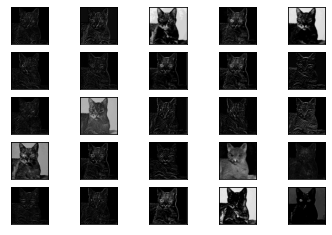

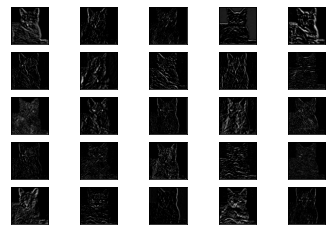

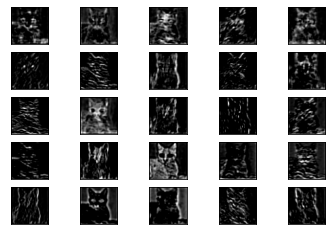

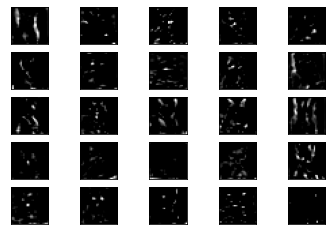

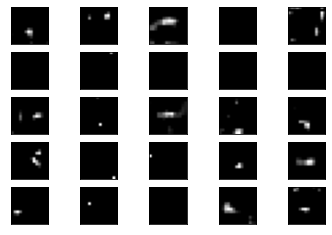

In [ ]:
#importing necessary libraries
from matplotlib import pyplot

fmap_count = 0
for fmap in feature_maps:
  length = 5
  width = 5
  #plotting 25 feature maps in a 5x5 grid
  ix = 1
  for l in range(length):
    for w in range(width):
      #creating subplot
      ax = pyplot.subplot(length, width, ix)
      #removing axis numbering from plots
      ax.set_xticks([]) 
      ax.set_yticks([])
      #plotting feature maps in grayscale
      pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
      #save each output map in a PDF file to save the quality of images
      if ix == 25:
        pyplot.savefig("/content/drive/My Drive/CNN_visualizer/3/VGG19_fmap_layer" + str(ixs[fmap_count]) +'.pdf')
      ix += 1
  fmap_count += 1
 # show the figure
  pyplot.show()